## Q1_Ans. Implement back propogation neural network using different activation functions and analysis the performance

In [1]:
import math
import copy
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.special import expit as sigmoid

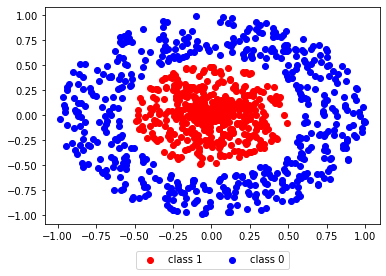

In [2]:
np.random.seed(0)

def generate_dataset(N_points):
    # 1 class
    radiuses = np.random.uniform(0, 0.5, size=N_points//2)
    angles = np.random.uniform(0, 2*math.pi, size=N_points//2)
    
    x_1 = np.multiply(radiuses, np.cos(angles)).reshape(N_points//2, 1)
    x_2 = np.multiply(radiuses, np.sin(angles)).reshape(N_points//2, 1)
    X_class_1 = np.concatenate((x_1, x_2), axis=1)
    Y_class_1 = np.full((N_points//2,), 1)
        
    # 0 class
    radiuses = np.random.uniform(0.6, 1, size=N_points//2)
    angles = np.random.uniform(0, 2*math.pi, size=N_points//2)
    
    x_1 = np.multiply(radiuses, np.cos(angles)).reshape(N_points//2, 1)
    x_2 = np.multiply(radiuses, np.sin(angles)).reshape(N_points//2, 1)
    X_class_0 = np.concatenate((x_1, x_2), axis=1)
    Y_class_0 = np.full((N_points//2,), 0)
        
    X = np.concatenate((X_class_1, X_class_0), axis=0)
    Y = np.concatenate((Y_class_1, Y_class_0), axis=0)
    return X, Y
    
N_points = 1000
X, Y = generate_dataset(N_points)

plt.scatter(X[:N_points//2, 0], X[:N_points//2, 1], color='red', label='class 1') 
plt.scatter(X[N_points//2:, 0], X[N_points//2:, 1], color='blue', label='class 0')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.show()

# Forward propagation

In [3]:
weights = {
    'W1': np.random.randn(3, 2),
    'b1': np.zeros(3),
    'W2': np.random.randn(3),
    'b2': 0,
}

def forward_propagation(X, weights):    
    # this implement the vectorized equations defined above.
    Z1 = np.dot(X, weights['W1'].T)  + weights['b1']
    H = sigmoid(Z1)
    Z2 = np.dot(H, weights['W2'].T) + weights['b2']
    Y = sigmoid(Z2)    
    return Y, Z2, H, Z1

# Backpropagation

In [4]:
def back_propagation(X, Y_T, weights):
    N_points = X.shape[0]
    
    # forward propagation
    Y, Z2, H, Z1 = forward_propagation(X, weights)
    L = (1/N_points) * np.sum(-Y_T * np.log(Y) - (1 - Y_T) * np.log(1 - Y))
    # back propagation
    dLdY = 1/N_points * np.divide(Y - Y_T, np.multiply(Y, 1-Y))
    dLdZ2 = np.multiply(dLdY, (sigmoid(Z2)*(1-sigmoid(Z2))))
    dLdW2 = np.dot(H.T, dLdZ2)
    dLdb2 = np.dot(dLdZ2.T, np.ones(N_points))
    dLdH = np.dot(dLdZ2.reshape(N_points, 1), weights['W2'].reshape(1, 3))
    dLdZ1 = np.multiply(dLdH, np.multiply(sigmoid(Z1), (1-sigmoid(Z1))))
    dLdW1 = np.dot(dLdZ1.T, X)
    dLdb1 = np.dot(dLdZ1.T, np.ones(N_points))
    
    
    gradients = {
        'W1': dLdW1,
        'b1': dLdb1,
        'W2': dLdW2,
        'b2': dLdb2,
    }
    return gradients, L

# Training: gradient descent

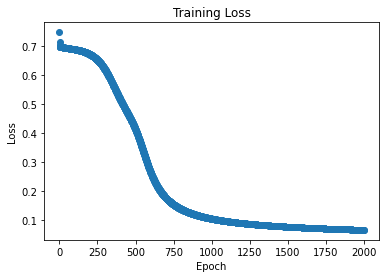

In [5]:
epochs = 2000
epsilon = 1
initial_weights = copy.deepcopy(weights)
    
losses = []
for epoch in range(epochs):
    gradients, L = back_propagation(X, Y, weights)
    for weight_name in weights:
        weights[weight_name] -= epsilon * gradients[weight_name]
        
    losses.append(L)
    
plt.scatter(range(epochs), losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Visualize what the network learned

In [6]:
def visualization(weights, X_data, title, superposed_training=False):
    N_test_points = 1000
    xs = np.linspace(1.1*np.min(X_data), 1.1*np.max(X_data), N_test_points)
    datapoints = np.transpose([np.tile(xs, len(xs)), np.repeat(xs, len(xs))])
    Y_initial = forward_propagation(datapoints, weights)[0].reshape(N_test_points, N_test_points)
    X1, X2 = np.meshgrid(xs, xs)
    plt.pcolormesh(X1, X2, Y_initial)
    plt.colorbar(label='P(1)')
    if superposed_training:
        plt.scatter(X_data[:N_points//2, 0], X_data[:N_points//2, 1], color='red') 
        plt.scatter(X_data[N_points//2:, 0], X_data[N_points//2:, 1], color='blue') 
    plt.title(title)
    plt.show()

C:\Users\sonaw\AppData\Local\Temp/ipykernel_3020/3300960771.py:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X1, X2, Y_initial)


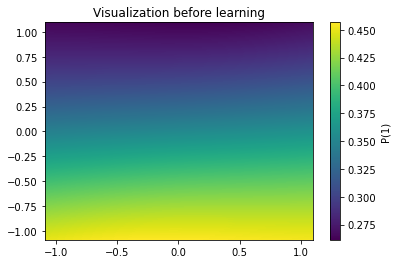

In [7]:
visualization(initial_weights, X,  'Visualization before learning')

C:\Users\sonaw\AppData\Local\Temp/ipykernel_3020/3300960771.py:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X1, X2, Y_initial)


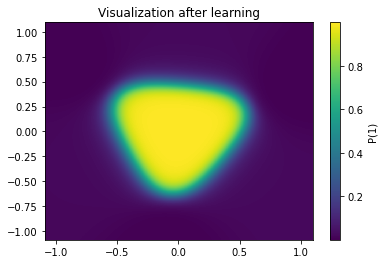

In [8]:
visualization(weights, X, 'Visualization after learning')

C:\Users\sonaw\AppData\Local\Temp/ipykernel_3020/3300960771.py:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X1, X2, Y_initial)


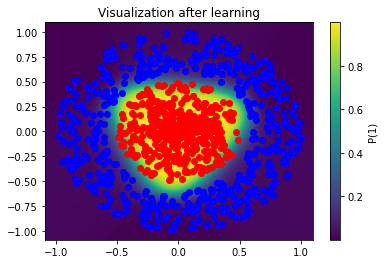

In [9]:
visualization(weights, X, 'Visualization after learning', superposed_training=True)

# With a XOR like distribution:  implementation with another distribution.

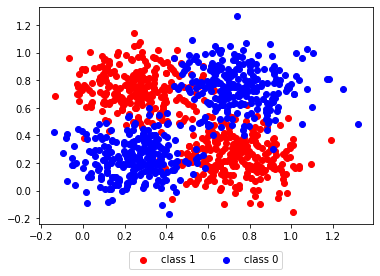

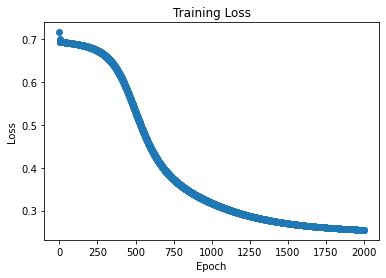

C:\Users\sonaw\AppData\Local\Temp/ipykernel_3020/3300960771.py:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X1, X2, Y_initial)


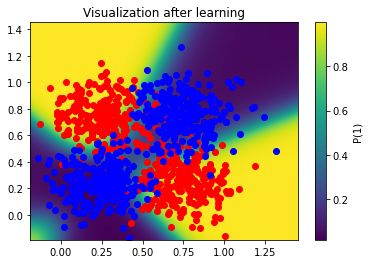

In [10]:
def generate_xor_like_dataset(N_points):
    # 1 class
    X_class_1 = np.concatenate(
        (np.concatenate(
            (np.random.normal(0.25, 0.15, size=N_points//4).reshape(N_points//4,1), 
             np.random.normal(0.75, 0.15, size=N_points//4).reshape(N_points//4,1)), 
            axis=1),
        np.concatenate(
            (np.random.normal(0.75, 0.15, size=N_points//4).reshape(N_points//4,1), 
             np.random.normal(0.25, 0.15, size=N_points//4).reshape(N_points//4,1)), 
            axis=1))
    )
    Y_class_1 = np.full((N_points//2,), 1)
        
    # 0 class
    X_class_0 = np.concatenate(
        (np.concatenate(
            (np.random.normal(0.25, 0.15, size=N_points//4).reshape(N_points//4,1), 
             np.random.normal(0.25, 0.15, size=N_points//4).reshape(N_points//4,1)), 
            axis=1),
        np.concatenate(
            (np.random.normal(0.75, 0.15, size=N_points//4).reshape(N_points//4,1), 
             np.random.normal(0.75, 0.15, size=N_points//4).reshape(N_points//4,1)), 
            axis=1))
    )
    Y_class_0 = np.full((N_points//2,), 0)
        
    X = np.concatenate((X_class_1, X_class_0), axis=0)
    Y = np.concatenate((Y_class_1, Y_class_0), axis=0)
    return X, Y
    
xor_X, xor_Y = generate_xor_like_dataset(N_points)

plt.scatter(xor_X[:N_points//2, 0], xor_X[:N_points//2, 1], color='red', label='class 1') 
plt.scatter(xor_X[N_points//2:, 0], xor_X[N_points//2:, 1], color='blue', label='class 0')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.show()

xor_weights = {
    'W1': np.random.randn(3, 2),
    'b1': np.zeros(3),
    'W2': np.random.randn(3),
    'b2': 0,
}
xor_initial_weights = copy.deepcopy(xor_weights)
xor_losses = []
for epoch in range(epochs):
    gradients, L = back_propagation(xor_X, xor_Y, xor_weights)
    for weight_name in xor_weights:
        xor_weights[weight_name] -= epsilon * gradients[weight_name]
        
    xor_losses.append(L)
    
plt.scatter(range(epochs), xor_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

visualization(xor_weights, xor_X, 'Visualization after learning', superposed_training=True)

# Activation Functions
* (i) Step Activation Function
* (ii) Sigmoid Functions:
        There are two types of sigmoidal functions:
        1. Binary Sigmoid
        2. Bipolar Sigmoid

# Binary Sigmoid Function:

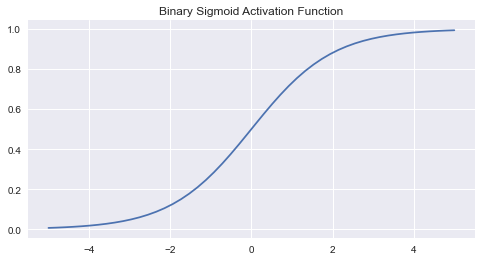

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn')
plt.figure(figsize=(8,4))
def SigmoidBinary(t):
    return 1/(1+np.exp(-t))
t = np.linspace(-5, 5)
plt.plot(t, SigmoidBinary(t))
plt.title('Binary Sigmoid Activation Function')
plt.show()

# Bipolar Sigmoid Function:

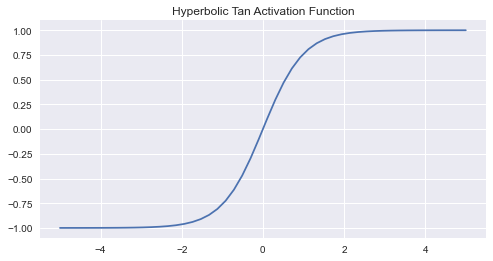

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn')
plt.figure(figsize=(8,4))
def HyperbolicTan(t):
    return np.tanh(t)
t = np.linspace(-5, 5)
plt.plot(t, HyperbolicTan(t))
plt.title('Hyperbolic Tan Activation Function')
plt.show()

There were various problems with sigmoid and hyperbolic tan activation functions and that’s why we need to see a few more activation functions such as ReLu, Leaky ReLu, Elu, etc. We are going to describe them below :

# Leaky RELU:

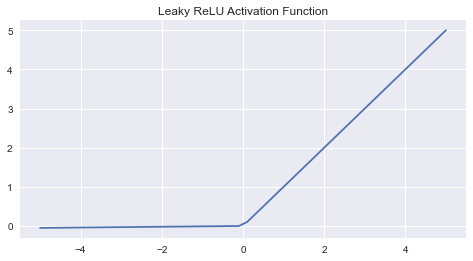

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn')
plt.figure(figsize=(8,4))
def LeakyRectifiedLinearUnit(arr):
    lst=[]
    for i in arr:
        if i>=0:
            lst.append(i)
        else:
            lst.append(0.01*i)
    return lst
arr = np.linspace(-5, 5)
plt.plot(arr, LeakyRectifiedLinearUnit(arr))
plt.title('Leaky ReLU Activation Function')
plt.show()

# ELU (Exponential Linear Unit) function:

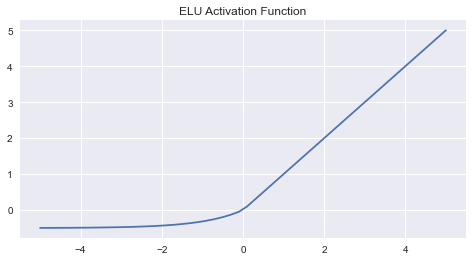

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn')
plt.figure(figsize=(8,4))
def elu(arr):
    lst=[]
    for i in arr:
        if i<0:
            lst.append(0.5*(np.exp(i) -1))
        else:
            lst.append(i)
    return lst
arr = np.linspace(-5, 5)
plt.plot(arr, elu(arr))
plt.title('ELU Activation Function')
plt.show()

# Softmax Function:

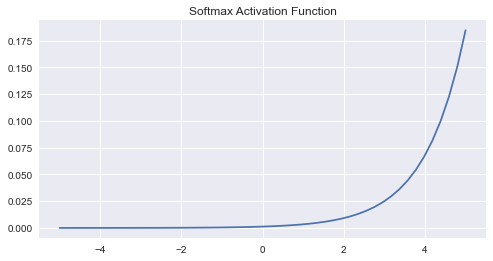

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn')
plt.figure(figsize=(8,4))
def softmax(t):
    return np.exp(t) / np.sum(np.exp(t))
t = np.linspace(-5, 5)
plt.plot(t, softmax(t))
plt.title('Softmax Activation Function')
plt.show()

# backPropogation_2 Hidden layer

In [16]:
# Using Keras Library

In [17]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense

In [18]:
# Traing Data
input_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], "float32")

output_data = np.array([[0], [1], [1], [0]], "float32")

In [19]:
# Setting up the model
model = Sequential()
model.add(Dense(16, input_dim=2, activation='sigmoid'))
model.add(Dense(12, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [20]:
# Training the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['binary_accuracy'])

In [21]:
# model.fit(input_data, output_data, epochs=500, verbose=2)

In [22]:
# Testing the model
print(model.predict(input_data).round())

1/1 [==============================] - 0s 141ms/step
[[1.]
 [1.]
 [1.]
 [1.]]


# Implementation of activation functions in python

## Sigmoid

In [23]:
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [24]:
sigmoid(100)

1.0

In [25]:
sigmoid(1)

0.7310585786300049

In [26]:
sigmoid(-56)

4.780892883885469e-25

In [27]:
sigmoid(0.5)

0.6224593312018546

## tanh

In [28]:
def tanh(x):
  return (math.exp(x) - math.exp(-x)) / (math.exp(x) + math.exp(-x))

In [29]:
tanh(-56)

-1.0

In [30]:
tanh(50)

1.0

In [31]:
tanh(1)

0.7615941559557649

## ReLU


In [32]:
def relu(x):
    return max(0,x)

In [33]:
relu(-100)

0

In [34]:
relu(8)

8

# Leaky ReLU

In [35]:
def leaky_relu(x):
    return max(0.1*x,x)

In [36]:
leaky_relu(-100)

-10.0

In [37]:
leaky_relu(8)

8

In [ ]:
# plot graph

In [38]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [39]:
def tanh(x):
    return np.tanh(x)

def sigmoid(x):
    return 1/(1 + np.exp(-x))

Text(0.5, 1.0, 'tanh')

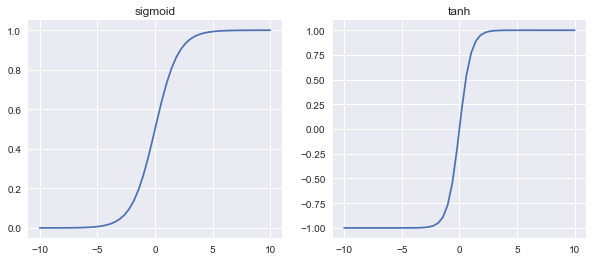

In [40]:
plt.figure(figsize=[10, 4])
x = np.linspace(-10, 10)

plt.subplot(1, 2, 1)
plt.plot(x, sigmoid(x))
plt.title('sigmoid')

plt.subplot(1, 2, 2)
plt.plot(x, tanh(x))
plt.title('tanh')